# CAB FARE PREDICTION


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import missingno

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
sns.set(style="darkgrid")

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

# Reading Data

In [4]:
train_data = pd.read_csv('train_cab.csv',header=0)
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
predict_data = pd.read_csv('test.csv',header=0)

# Data Overview

In [6]:
train_data.shape

(16067, 7)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [8]:
train_data.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

Text(0.5, 1.0, 'Missing values')

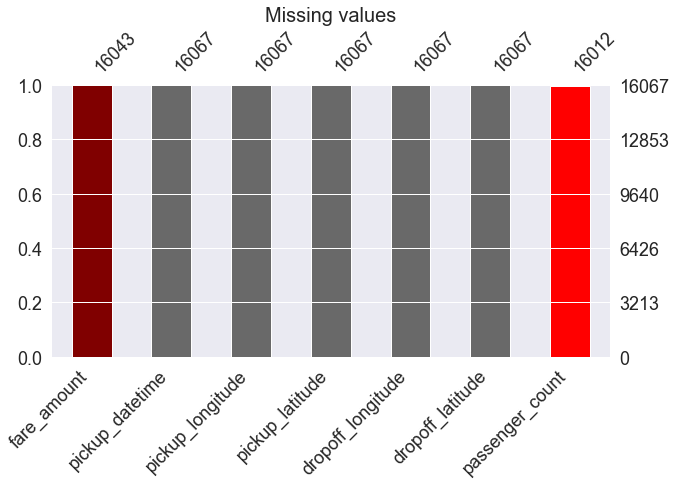

In [9]:
color=['maroon','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey','red']
missingno.bar(train_data,color=color,fontsize=18,figsize=(10,5))
plt.title('Missing values',fontsize=20)

# Data Cleaning and Manipulation

In [10]:
train_data.drop(['pickup_datetime'],axis='columns',inplace=True)
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [11]:
train_data = train_data[np.logical_and(train_data['pickup_longitude']!=train_data['dropoff_longitude'],
                           train_data['pickup_latitude']!=train_data['dropoff_latitude'])]
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15603 entries, 0 to 16066
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15581 non-null  object 
 1   pickup_longitude   15603 non-null  float64
 2   pickup_latitude    15603 non-null  float64
 3   dropoff_longitude  15603 non-null  float64
 4   dropoff_latitude   15603 non-null  float64
 5   passenger_count    15548 non-null  float64
dtypes: float64(5), object(1)
memory usage: 853.3+ KB


In [13]:
train_data['fare_amount']= train_data['fare_amount'].apply(pd.to_numeric, errors='coerce')
train_data['fare_amount']=train_data['fare_amount'].replace({0:np.nan})

In [14]:
train_data['passenger_count']= train_data['passenger_count'].fillna(0)
train_data['passenger_count']= train_data['passenger_count'].astype(int)
train_data['passenger_count']= train_data['passenger_count'].replace({0:np.nan})

In [15]:
train_data['pickup_longitude']= train_data['pickup_longitude'].replace({0:np.nan})
train_data['pickup_latitude']= train_data['pickup_latitude'].replace({0:np.nan})
train_data['dropoff_longitude']= train_data['dropoff_longitude'].replace({0:np.nan})
train_data['dropoff_latitude']= train_data['dropoff_latitude'].replace({0:np.nan})

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15603 entries, 0 to 16066
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15579 non-null  float64
 1   pickup_longitude   15591 non-null  float64
 2   pickup_latitude    15591 non-null  float64
 3   dropoff_longitude  15593 non-null  float64
 4   dropoff_latitude   15594 non-null  float64
 5   passenger_count    15491 non-null  float64
dtypes: float64(6)
memory usage: 853.3 KB


# Analyzing the Missing Value 

In [17]:
missing_val = DataFrame(train_data.isnull().sum())

missing_val = missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})

missing_val['missing_percent'] = (missing_val['count']/len(train_data)*100)

missing_val = missing_val.sort_values('missing_percent', ascending = False).reset_index(drop = True)

missing_val.describe

<bound method NDFrame.describe of            Variables  count  missing_percent
0    passenger_count    112         0.717811
1        fare_amount     24         0.153817
2   pickup_longitude     12         0.076908
3    pickup_latitude     12         0.076908
4  dropoff_longitude     10         0.064090
5   dropoff_latitude      9         0.057681>

# Missing Value Imputation

In [18]:
train_data['pickup_longitude'].loc[80]

-73.97383

In [19]:
train_data['pickup_longitude'].loc[80] = np.nan

In [20]:
train_data['pickup_longitude'].loc[80]

nan

In [21]:
train_data_pseudo= Series(train_data['pickup_longitude'])
train_data_pseudo

0       -73.844311
1       -74.016048
2       -73.982738
3       -73.987130
4       -73.968095
           ...    
16062   -74.008820
16063   -73.981310
16064   -73.972507
16065   -73.957027
16066   -74.002111
Name: pickup_longitude, Length: 15603, dtype: float64

In [22]:
#mean imputation
train_data_pseudo['pickup_longitude'] = train_data['pickup_longitude'].fillna(train_data['pickup_longitude'].mean())
train_data_pseudo['pickup_longitude'].loc[80]

-73.91159477356683

In [23]:
#median imputation
train_data_pseudo= Series(train_data['pickup_longitude'])

train_data_pseudo['pickup_longitude'] = train_data['pickup_longitude'].fillna(train_data['pickup_longitude'].median())
train_data_pseudo['pickup_longitude'].loc[80]

-73.9820675

#### As we can see, the median value is much closer to the real value in comparison of the mean value. Hence, we will usr .median() for missing value imputation.

In [24]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [25]:
train_data['fare_amount'] = train_data['fare_amount'].fillna(train_data['fare_amount'].median())

In [26]:
train_data['pickup_longitude'] = train_data['pickup_longitude'].fillna(train_data['pickup_longitude'].median())
train_data['pickup_latitude'] = train_data['pickup_latitude'].fillna(train_data['pickup_latitude'].median())
train_data['dropoff_longitude'] = train_data['dropoff_longitude'].fillna(train_data['dropoff_longitude'].median())
train_data['dropoff_latitude'] = train_data['dropoff_latitude'].fillna(train_data['dropoff_latitude'].median())

train_data['passenger_count'] = train_data['passenger_count'].fillna(train_data['passenger_count'].mode())

In [27]:
#Imputing the NAs in target variables may hamper the model, so it is preferred to remove NA rows of the data
train_data=train_data.dropna()

In [28]:
#converting into proper daTa types
convert_dict = {'fare_amount':'float','passenger_count':'int'}
train_data= train_data.astype(convert_dict)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491 entries, 0 to 16065
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15491 non-null  float64
 1   pickup_longitude   15491 non-null  float64
 2   pickup_latitude    15491 non-null  float64
 3   dropoff_longitude  15491 non-null  float64
 4   dropoff_latitude   15491 non-null  float64
 5   passenger_count    15491 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 786.7 KB


# Outlier Analysis

In [30]:
#saving the data at another dataset

df=train_data.copy()


In [31]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
#converting irregular fare_amount into nan
train_data.loc[train_data['fare_amount'] < 0 , 'fare_amount'] = np.nan
train_data.loc[train_data['fare_amount'] > 30 , 'fare_amount'] = np.nan
train_data=train_data.dropna()

In [33]:
train_data.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [34]:
train_data.loc[train_data['passenger_count'] > 8, 'passenger_count'] = np.nan

In [35]:
# removing outliers using IQR technique
outliers =['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

#calculating quartiles
for list in outliers:
    q75,q25 = np.percentile(train_data[list],[75,25])
    
    #calculating IQR
    iqr = q75 - q25
    
    #calculating inner and outer fence
    minm = q25 - (iqr*1.25)
    maxm = q75 + (iqr*1.25)
    
    #replacing the outliers with nan
    train_data.loc[train_data[list] < minm , list] = np.nan
    train_data.loc[train_data[list] > maxm , list] = np.nan

In [36]:
train_data.isnull().sum()

fare_amount            0
pickup_longitude     456
pickup_latitude      451
dropoff_longitude    633
dropoff_latitude     784
passenger_count       18
dtype: int64

In [37]:
train_data['pickup_longitude'] = train_data['pickup_longitude'].fillna(train_data['pickup_longitude'].median())
train_data['pickup_latitude'] = train_data['pickup_latitude'].fillna(train_data['pickup_latitude'].median())
train_data['dropoff_longitude'] = train_data['dropoff_longitude'].fillna(train_data['dropoff_longitude'].median())
train_data['dropoff_latitude'] = train_data['dropoff_latitude'].fillna(train_data['dropoff_latitude'].median())

train_data['passenger_count'] = train_data['passenger_count'].fillna(int(train_data['passenger_count'].mode()))

In [38]:
train_data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 0 to 16065
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        14686 non-null  float64
 1   pickup_longitude   14686 non-null  float64
 2   pickup_latitude    14686 non-null  float64
 3   dropoff_longitude  14686 non-null  float64
 4   dropoff_latitude   14686 non-null  float64
 5   passenger_count    14686 non-null  float64
dtypes: float64(6)
memory usage: 803.1 KB


In [40]:
#correcting the data type of passenger_count
train_data['passenger_count'] = train_data['passenger_count'].astype('int')
train_data['passenger_count'] = train_data['passenger_count'].astype('category')

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 0 to 16065
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   fare_amount        14686 non-null  float64 
 1   pickup_longitude   14686 non-null  float64 
 2   pickup_latitude    14686 non-null  float64 
 3   dropoff_longitude  14686 non-null  float64 
 4   dropoff_latitude   14686 non-null  float64 
 5   passenger_count    14686 non-null  category
dtypes: category(1), float64(5)
memory usage: 703.0 KB


# Feature Selection

In [42]:
#haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
   
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [43]:
train_data['dist'] = haversine(train_data['pickup_longitude'],train_data['pickup_latitude'],
                              train_data['dropoff_longitude'],train_data['dropoff_latitude']) 
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,4.5,-73.982675,40.721319,-73.981742,40.712278,1,0.296167
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,4.628504
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.001022
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.910440
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.361021


In [44]:
numeric=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'dist']
train_data_corr = train_data.loc[:,numeric]

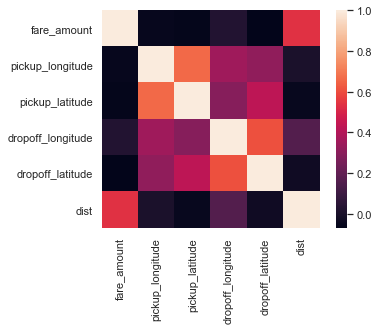

In [45]:
corr = train_data_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            square=True)

In [46]:
train_data= train_data[np.logical_and(train_data['pickup_longitude']!=train_data['dropoff_longitude'],
                                     train_data['pickup_latitude']!=train_data['dropoff_latitude'])]

# Model Development

# 1. Decision Tree

In [47]:
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [48]:
#Dividing the given data into train and test samples
train1,test1 = train_test_split(train_data,test_size=0.2)

In [49]:
#Decision Tree for regression
model_DT = DecisionTreeRegressor(max_depth=2).fit(train1.iloc[:,1:7],train1.iloc[:,0])

model_DT

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
#applying the model
predict_DT = model_DT.predict(test1.iloc[:,1:7])

In [51]:
#MAPE calculation
def MAPE(y_true,y_predict):
    mape=np.mean(np.abs((y_true-y_predict)/y_true))*100
    return mape

In [52]:
MAPE(test1.iloc[:,0],predict_DT)

36.084287396174766

### The error comes out to be 36.084287396174766%. Hence, the model accuracy is 63.9157126038%.

# 2. Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_RF = RandomForestRegressor(n_estimators=10).fit(train1.iloc[:,1:7],train1.iloc[:,0])

model_RF

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
#applying the model
predict_RF = model_RF.predict(test1.iloc[:,1:7])

In [56]:
MAPE(test1.iloc[:,0],predict_RF)

25.753204572365583

### The error comes out to be 25.753204572365583%. Hence, the model accuracy is 74.2467954276%.

# 3. Linear Regression

In [57]:
from sklearn import linear_model

In [58]:
model_LR= linear_model.LinearRegression().fit(train1.iloc[:,1:7],train1.iloc[:,0])

model_LR

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#applying the model
predict_LR = model_LR.predict(test1.iloc[:,1:7])

In [60]:
MAPE(test1.iloc[:,0],predict_LR)

34.48905124977446

### The error comes out to be 34.48905124977446%. Hence, the model accuracy is 65.5109487502%.

# 4. KNN 

In [61]:
#KNN implementation
from sklearn.neighbors import KNeighborsRegressor

In [62]:
model_KNN = KNeighborsRegressor(n_neighbors = 1).fit(train1.iloc[: , 1:7],train1.iloc[:, 0])

model_KNN

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [63]:
#applying the model
predict_KNN = model_KNN.predict(test1.iloc[:,1:7])

In [64]:
MAPE(test1.iloc[:,0],predict_KNN)

39.91606706898117

### The error comes out to be 39.91606706898117%. Hence, the model accuracy is 60.083932931%.

### Accuracy of models:
1. Decision Tree- 63.9157126038%
2. Random Forest- 74.2467954276%
3. Linear Regression- 65.5109487502%
4. KNN- 60.083932931%

### Hence, on the basis of accuracy, we will move forward with the Random Forest model.

# Predicting the fare price

In [65]:
predict_data['dist'] = haversine( predict_data['pickup_latitude'], predict_data['pickup_longitude'],
                 predict_data['dropoff_latitude'], predict_data['dropoff_longitude'])

predict_data['fare_amount']=0
predict_data['passenger_count']=predict_data['passenger_count'].astype('category')
predict_data = predict_data.drop(columns="pickup_datetime")

In [66]:
model_RF = RandomForestRegressor(n_estimators = 10).fit(train_data.iloc[:, 1:7], train_data.iloc[:,0])

predict_data['fare_amount'] = model_RF.predict(predict_data.iloc[:, 0:6])

In [67]:
predict_data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,10.70
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,10.09
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,8.85
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,11.37
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,17.44
